## Librerías

In [ ]:
import pandas as pd #Pandas es una biblioteca esencial para el análisis y manipulación de datos
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
ds_df = pd.read_csv(f'heart_failure_clinical_records.csv')

In [10]:
df = ds_df.copy()
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0


## EDA
¿Qué visualizaciones puedo realizar para analizar mis datos?
* Resumen estadístico incluyendo métricas como  la media, desviación estándar, percentiles, mínimo y máximo
* Matriz de correlación
* PCA: Componentes Principales
* Gráfico de barras
* Gráfico de barras apiladas
* Histogramas
* Diagramas de caja
* Gráfico dispersión y Dispersión 3D







Metadatos:


*   **age**: Edad del paciente (años)
*   **anaemia**: Disminución de glóbulos rojos o hemoglobina
*   **creatinine_phosphokinase**: Nivel de la enzima CPK en la sangre (mcg/L)
*   **diabetes**: Si el paciente tiene diabetes
*   **ejection_fraction**: Porcentaje de sangre que sale del corazón en cada contracción
*   **high_blood_pressure**: Si el paciente tiene hipertensión
*   **platelets**: Plaquetas en la sangre (kiloplaquetas/mL)
*   **serum_creatinine**: Nivel de creatinina sérica en sangre (mg/dL)
*   **serum_sodium**: Nivel de sodio sérico en la sangre (mEq/L)
*   **sex**: Genero de la persona (mujer u hombre)
*   **smoking**: Si el paciente fuma o no
*   **time**: Período de seguimiento (días)
*   **DEATH_EVENT**: Si el paciente falleció durante el periodo de seguimiento.



In [11]:
#Clasificación de variables
continuas = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
discretas = ['anaemia','diabetes','high_blood_pressure','smoking','sex','DEATH_EVENT']

In [12]:
df.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


### Estadísticas descriptivas
Como primer análisis se realizó un resumen estadístico por cada una de las variables en el conjunto de datos utilizando el método describe() de python el cual calcula varias estadísticas descriptivas:
*   Conteo total de observaciones
*   La media
*   Desviación estándar
*   Los cuartiles
*   Valores mínimos y máximos



In [13]:
df.describe(percentiles=[x/10 for x in range(1,10)])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
10%,45.000000,0.000000,68.000000,0.000000,25.000000,0.000000,150000.000000,0.800000,132.000000,0.000000,0.000000,28.000000,0.000000
20%,50.000000,0.000000,102.000000,0.000000,25.000000,0.000000,198000.000000,0.900000,134.000000,0.000000,0.000000,60.000000,0.000000
30%,53.000000,0.000000,132.000000,0.000000,30.000000,0.000000,223000.000000,1.000000,135.000000,0.000000,0.000000,80.000000,0.000000
40%,58.000000,0.000000,169.200000,0.000000,35.000000,0.000000,243000.000000,1.000000,136.000000,1.000000,0.000000,95.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
60%,63.000000,1.000000,400.000000,1.000000,38.800000,0.000000,271000.000000,1.200000,138.000000,1.000000,0.000000,150.000000,0.000000


Un segundo análisis que se realizó es la matriz de correlación, en la cual no se encontraron relaciones significativas entre las variables.

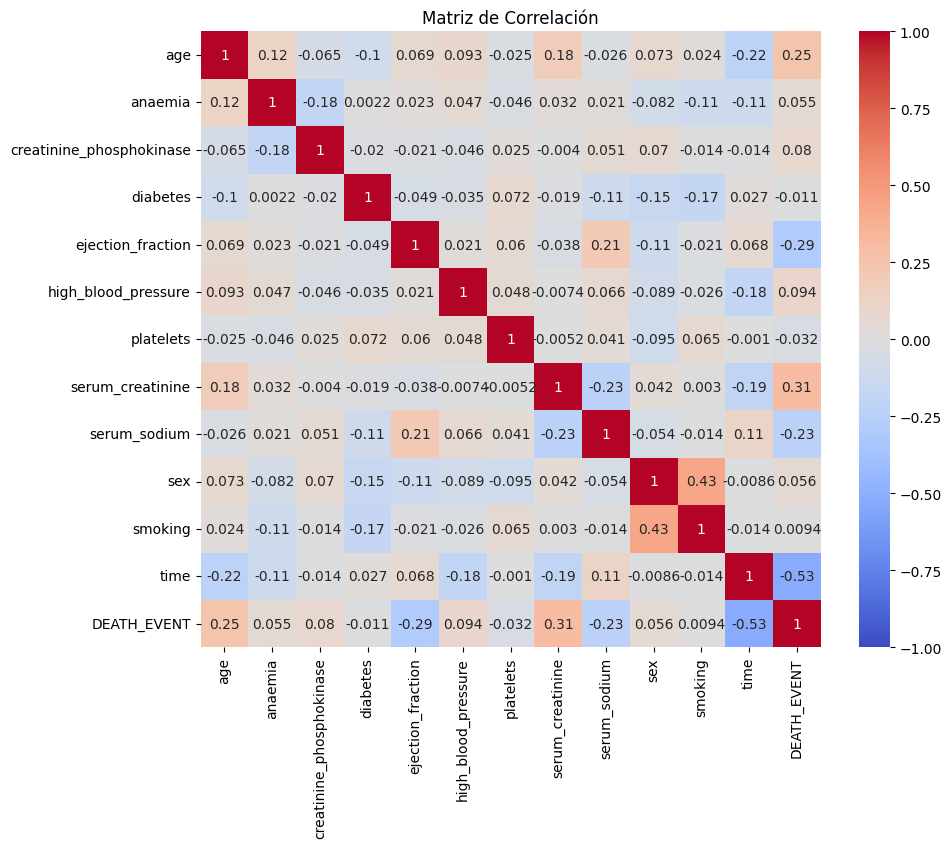

In [14]:
corr_matriz = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### PCA: Componenetes Principales
Es una técnica de **reducción de dimensionalidad** por lo cual se aplico para explorar y visualizar el conjunto de datos.

Se seleccionan los primeros componentes principales que capturan la mayor parte de la varianza. El número de componentes a elegir se basa en el criterio de la varianza acumulada que se quiere preservar.
La **varianza** es una medida estadística que cuantifica la dispersión de un conjunto de datos respecto a su media.


Estandarizar (**StandardScaler**) significa ajustar las características de manera que tengan una media de 0 y una desviación estándar de 1. Calcular la Media y la Desviación Estándar:

1.  Media (𝜇): La media de cada característica.
2.  Desviación estándar (𝜎): La desviación estándar de cada característica.
Transformar los Datos: Cada valor 𝑥𝑖  de una característica se transforma usando la fórmula:

$$
x_i^{'} = \frac{x_i-μ}{𝜎}
$$

donde:

$x_i^{'}$​ es el valor estandarizado,

$x_i$​   es el valor original,

$𝜇$​   es la media de la característica, y

$𝜎$ es la desviación estándar.

Varianza explicada por cada componente: [0.13602202 0.13032876]


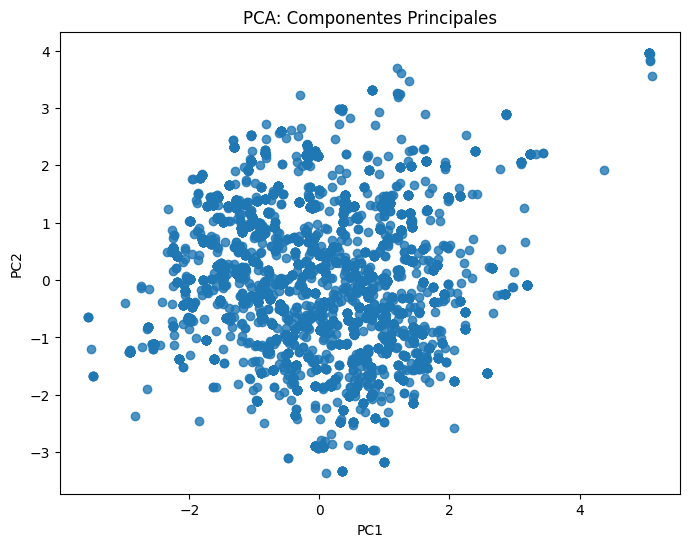

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(ds_df[ds_df.columns[:-1]])

pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_data = pca.fit_transform(scaled_data)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
pca_df = pd.DataFrame(data=pca_data, columns=['p1', 'p2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df.p1, pca_df.p2, alpha=0.8)
plt.title('PCA: Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.grid(True)
plt.show()

#### Gráfica de barras
Es una representación visual que muestra la comparación entre diferentes categorías por cada una de las variables.
De forma inmediata podemos visualizar que la mayoria de los pacientes no fuma.

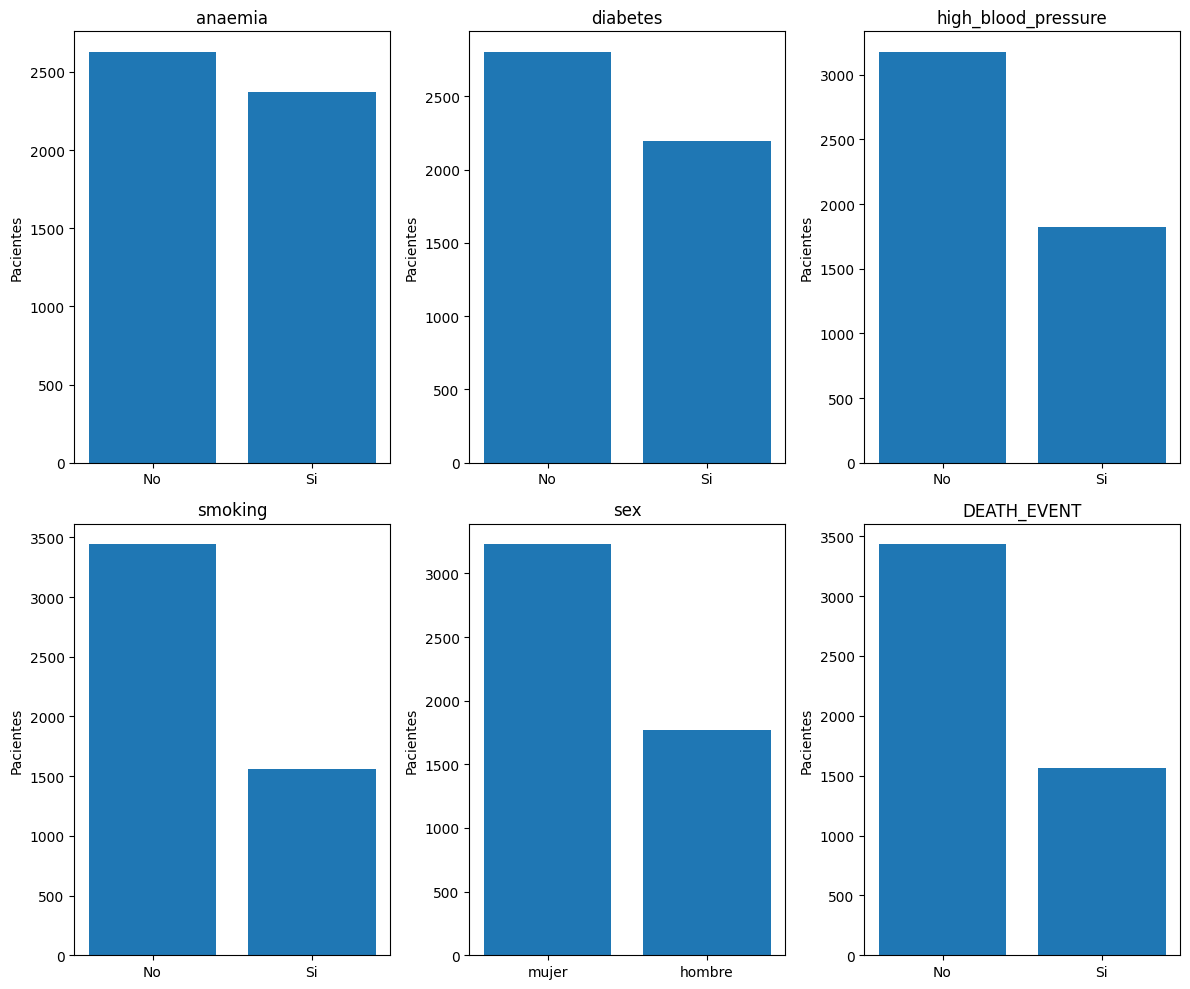

In [16]:
df.sex = ['mujer' if var==1 else 'hombre' for var in df.sex]
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12, 10))
x=0
for i in range(2):
    for j in range(3):
        if discretas[x]!= 'sex':
            df[discretas[x]]= ['Si' if var==1 else 'No' for var in df[discretas[x]]]
        df_plot = df[discretas[x]].value_counts().reset_index()

        axes[i,j].bar(df_plot[discretas[x]], df_plot['count'])
        axes[i,j].set_title(discretas[x])
        axes[i,j].set_ylabel('Pacientes')
        x+=1
plt.tight_layout()
plt.show()

#### Gráfica de barras apiladas
Es una representación visual que muestra la comparación entre diferentes categorías dentro de otro grupo (subcategoría) por cada una de las variables. De forma inmediata podemos visualizar que los pacientes que fallecieron durante el periodo de seguimiento aproximadamente el 45% de ellos eran hipertensos.


In [17]:
aux= df[['DEATH_EVENT','sex']].pivot_table(index='DEATH_EVENT',columns='sex',aggfunc={'sex':'count'})
aux.columns = [col[1] for col in aux.columns]

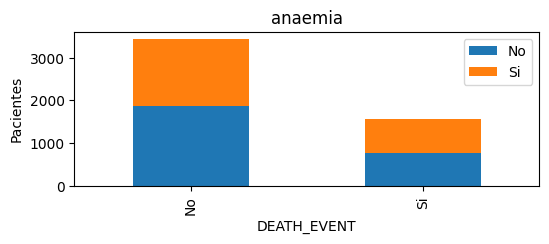

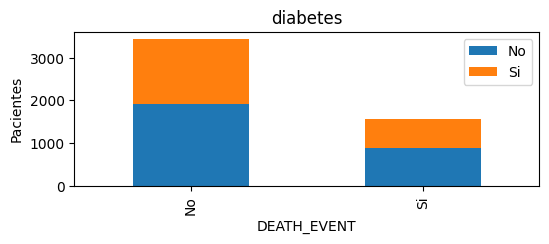

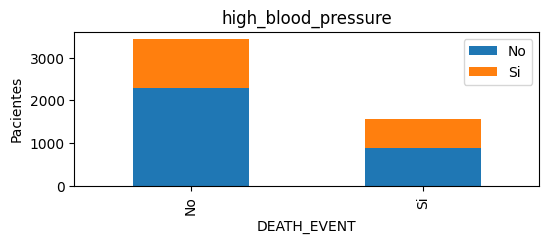

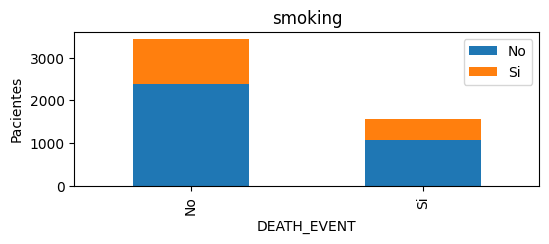

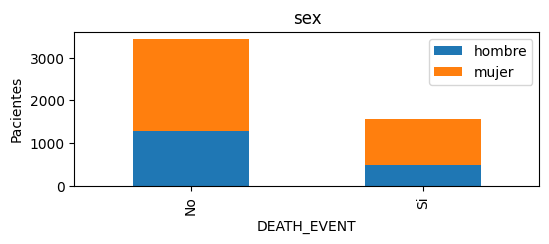

In [18]:
for var in discretas[:-1]:
    df_plot= df[['DEATH_EVENT',var]].pivot_table(index='DEATH_EVENT',columns=var,aggfunc={var:'count'})
    df_plot.columns = [col[1] for col in df_plot.columns]

    ax = df_plot.plot(kind='bar', stacked=True, figsize=(6, 2))
    plt.title(var)
    plt.ylabel('Pacientes')
    plt.show()


#### Histogramas
Es una representación visual para visualizar la distribución y frecuencia en un conjunto de datos numéricos facilitando la detección de patrones y anomalías.

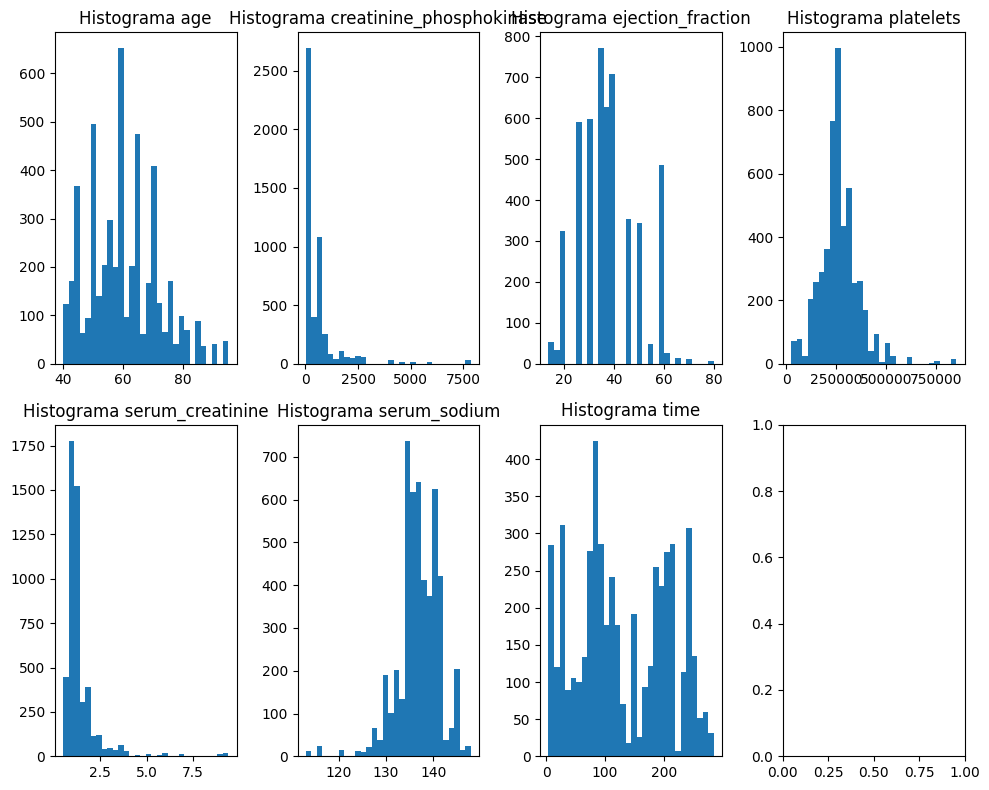

In [19]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(10, 8))
x=0
for i in range(2):
    for j in range(4):
        try:
            axes[i,j].hist(df[continuas[x]], bins=30) # density=True Normaliza el histograma
            axes[i,j].set_title(f'Histograma {continuas[x]}')
            x+=1
        except:
            continue
plt.tight_layout()
plt.show()

#### Diagramas de caja
Son una herramienta fundamental en el análisis exploratorio de datos:
*   Proporciona un resumen visual de medidas como la mediana, el rango intercuartilico y la dispersión general de los datos.
*   Facilita la detección de valores atípicos
*   Permite comparar la distribución y dispersión de datos entre disferentes grupos.

De forma inmediata podemos visualizar que el porcentaje de sangre que sale del corazón en cada contracción (ejection_fraction) en promedio es de 40% en los pacientes pero hay casos donde se van por arriba del 70%

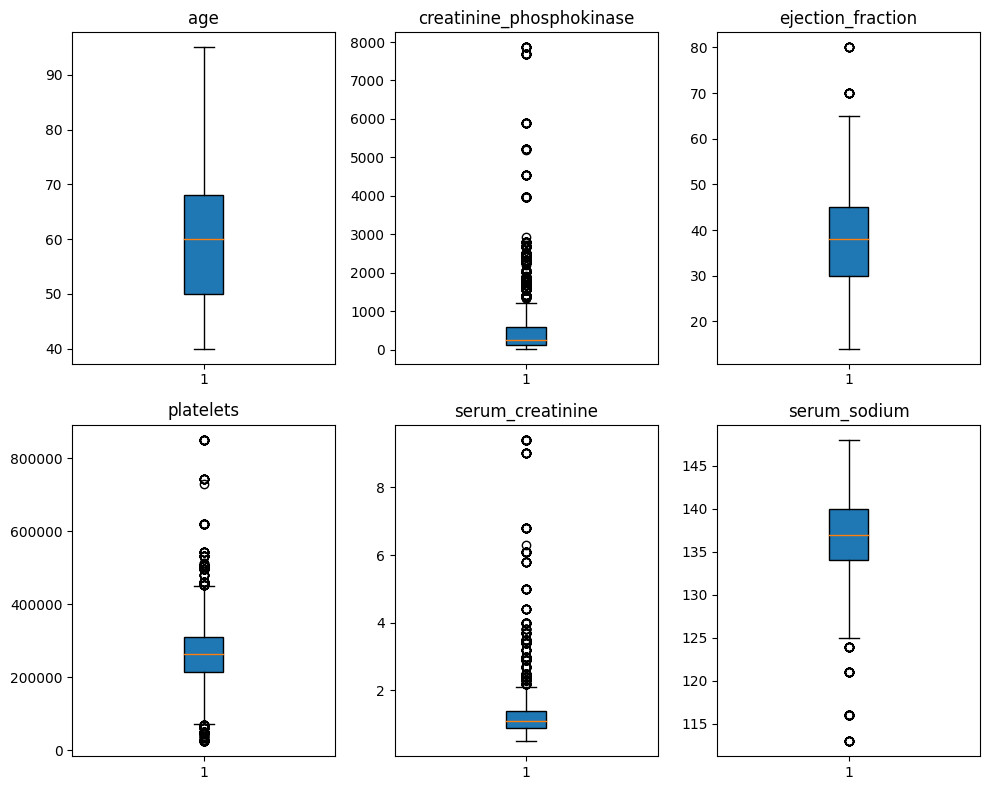

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(10, 8))
x=0
for i in range(2):
    for j in range(3):
        axes[i,j].boxplot(df[continuas[x]], patch_artist=True,showfliers=True)
        axes[i,j].set_title(continuas[x])
        x+=1
plt.tight_layout()
plt.show()


#### Gráfico de Dispersión
Es una representación gráfica para visualizar la relación entre dos variables y para identificar patrones o tendencias en los datos.


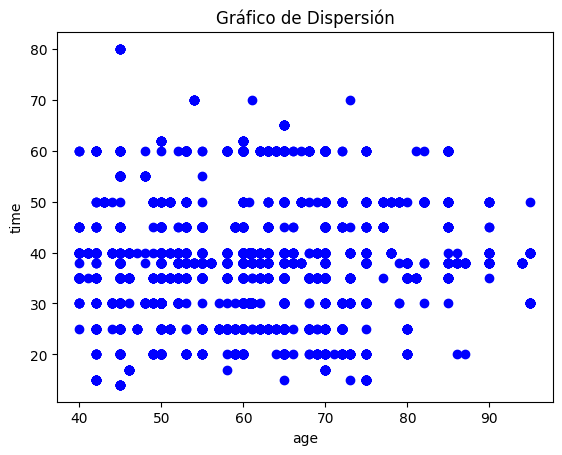

In [21]:
plt.scatter(df.age, df.ejection_fraction, color='blue')
plt.title('Gráfico de Dispersión')
plt.xlabel('age')
plt.ylabel('time')
plt.show()

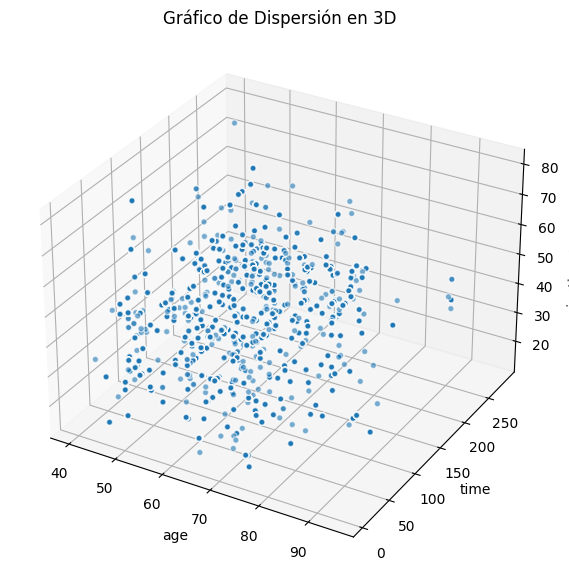

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.age, df.time, df.ejection_fraction, alpha=0.6, edgecolors='w')
ax.set_title('Gráfico de Dispersión en 3D')
ax.set_xlabel('age')
ax.set_ylabel('time')
ax.set_zlabel('ejection_fraction')

plt.show()